In [60]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


{'healthcare-dataset-stroke-data.csv': b'id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke\n9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1\n51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1\n31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1\n60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1\n1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1\n56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1\n53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1\n10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1\n27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1\n60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1\n12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1\n12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1\n12175,Female,54,0,0,Yes,Private,Urban,104.51,27.3,smokes,1\n8213,Mal

count    4014.000000
mean       50.369955
std        17.492326
min        19.000000
25%        36.000000
50%        51.000000
75%        64.000000
max        82.000000
Name: age, dtype: float64


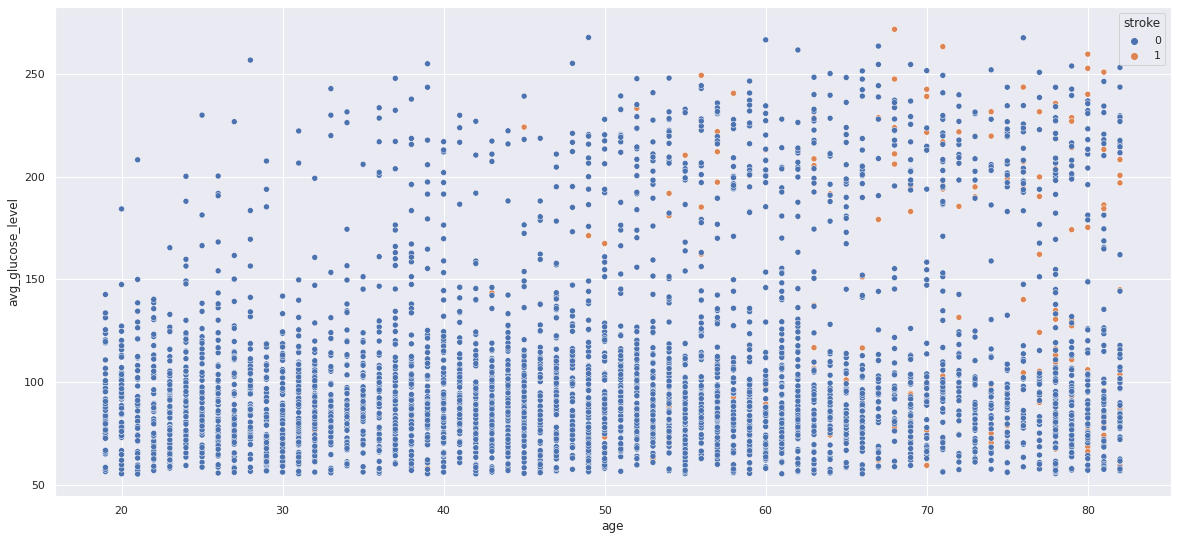

In [120]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
sns.set(rc={'figure.figsize':(20,9)})
df = df.dropna()
df = df.loc[df["age"] > 18]

sns.barplot(data=df,y = df.groupby("gender")["stroke"].transform("count"),x = "gender")
sns.barplot(data=df,y = df.groupby("age")["stroke"].transform("count"),x="age")
sns.scatterplot(data=df,x="age",y="bmi",hue="stroke")
sns.scatterplot(data=df,x="age",y="avg_glucose_level",hue="stroke")

be = preprocessing.LabelBinarizer()
le = preprocessing.LabelEncoder()
#male is 0 female is 1
df["gender"] = be.fit_transform(df["gender"])
# 0 is no 1 is yes
df["ever_married"] = be.fit_transform(df["ever_married"])
#0 is rural 1 is urban
df["Residence_type"] = be.fit_transform(df["Residence_type"])
# private is 2 govt_job is 0 self-employed is 3 1 is never_worked
df["work_type"] = le.fit_transform(df["work_type"])
#1 is formerly smoked 2 is never smoked 3 is smokes 4 0 is unknown
df["smoking_status"] = le.fit_transform(df["smoking_status"])

print(df["age"].describe())



